<a href="https://colab.research.google.com/github/HsinhanTsai/pycs4001/blob/main/project1_%E8%94%A1%E6%98%95%E7%BF%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# 原始資料
df = pd.read_csv('https://raw.githubusercontent.com/HsinhanTsai/pycs4001/main/brain_stroke.csv')
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
# patient who had a stroke
df_stroke = df.loc[df["stroke"]==1]
df_stroke = df_stroke.drop(columns=["ever_married","work_type","stroke"])
df_stroke.head(5)

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0,1,Rural,105.92,32.5,never smoked
2,Female,49.0,0,0,Urban,171.23,34.4,smokes
3,Female,79.0,1,0,Rural,174.12,24.0,never smoked
4,Male,81.0,0,0,Urban,186.21,29.0,formerly smoked


Female    140
Male      108
Name: gender, dtype: int64


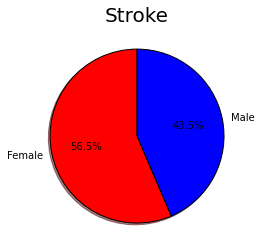

In [6]:
# 中風男女生比例
l = df_stroke["gender"].value_counts()
print(l)
plt.pie(l,labels=["Female","Male"],shadow=True,autopct="%1.1f%%",colors=["red","blue"],startangle=90,wedgeprops={'edgecolor': 'black'})
plt.title("Stroke",fontsize=20)
plt.show()

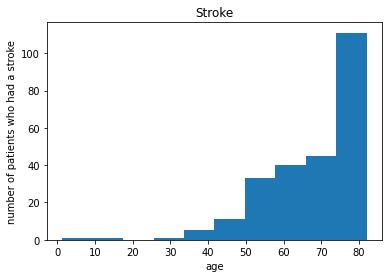

In [7]:
# 中風年齡層
plt.hist(df_stroke["age"],bins=10)  
plt.title("Stroke")
plt.xlabel("age")
plt.ylabel("number of patients who had a stroke")
plt.show()

In [8]:
# 抽菸和中風、高血壓、心臟疾病比例
df_smoke = df.groupby(["smoking_status"]).mean()
df_smoke

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
smoking_status,,,,,,
Unknown,30.313547,0.033333,0.032000,99.386300,25.458133,0.031333
formerly smoked,55.044983,0.132641,0.088812,112.520473,30.275317,0.080738
never smoked,47.053319,0.121328,0.048422,107.400898,29.468825,0.048422
smokes,47.159794,0.117268,0.078608,107.818724,30.089948,0.054124


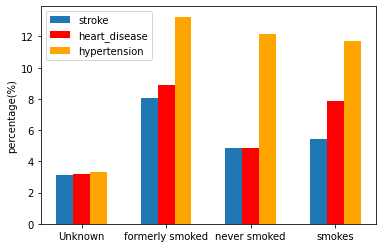

In [9]:
plt.bar([1,2,3,4],df_smoke["stroke"]*100, width = 0.2, label = "stroke")
plt.bar([1.2,2.2,3.2,4.2],df_smoke["heart_disease"]*100, color="red", width = 0.2, label = "heart_disease")
plt.bar([1.4,2.4,3.4,4.4],df_smoke["hypertension"]*100, color="orange", width = 0.2, label = "hypertension")
plt.ylabel("percentage(%)")
plt.xticks([1.2,2.2,3.2,4.2],("Unknown","formerly smoked","never smoked", "smokes"))
plt.legend()
plt.show()